In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py  #file loader
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

### Problem Statement

- trainging set of m_train images labeled as 🐱 (y=1) and not 🐱(y=0)
- a test set of m_test images labeled as cat or non_cat
- each image is of shape (num_px, num_px, 3) where 3 is for the 3channels (RGB). Thus, each image is square (height= num_px) and width (num_px)

In [2]:
# Loading data (cat/noncat)

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

(209, 64, 64, 3)
y = [0], it's a 'non-cat' picture'


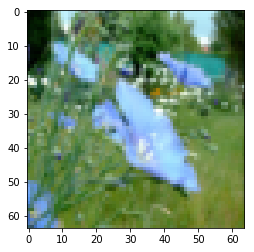

In [3]:
# Example of a picture
index = 20
print(train_set_x_orig.shape) # p shape[0]: depth shape[1]: columns shape[2]: row shape3: size of one pixel
plt.imshow(train_set_x_orig[index])
print("y = " + str(train_set_y[:,index]) + ", it's a '" + classes[np.squeeze(train_set_y[:,index])].decode("utf-8")+ "' picture'")

In [4]:
# Find the values of m_train/m_test/num_px
'''
- m_train (number of training examples)
- m_test (number of test examples)
- num_px (= height = width of a training image)
'''
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig[0].shape[0]

print(m_train, m_test, num_px)

209 50 64


In [5]:
# Reshape the training and test data sets
npix = 64*64*3

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],npix ).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],npix).T

print(train_set_x_flatten.shape, test_set_x_flatten.shape)

(12288, 209) (12288, 50)


In [6]:
print(train_set_x_flatten[0]) # select first piexels from each data samples
print(test_set_x_flatten[:,0]) # select all piexels from first data sample

[ 17 196  82   1   9  84  56  19  63  23 188   4 154  17  72 245 253 217
 140   2   5  17 164 156 122  15  78  36  14 180  39 190 233 129 137  26
  23  94  63 113 119   1  63 255  61   0  64  51  21  57 164 152 106  40
  15 255  31 141  52  75  81 125  99  94   2  86 226  76 139  43  24   7
  13 103  85 110  25  61  34  27 176 187  26 252  96  25  34  60 123  45
  99  49  26 154 141  62 152 194 113  57 172  70  22 142  37 127 172 122
 110  75 165 174   5 166 144 196   2  64 190 170  86 106 198  70 171   9
  50  84 161  23  79 228 104   1   5 255 142 196 135  89   0 188 255  17
  31 169 136  79 130 150 251   7  45 159  10 135  32  30 140  29  29 110
  99 242 158  30 240  84  10  93 200 190 133  74  25   3 106 133  12 105
 239   1  62  67  29 178  68  55 201 195 144 251 130  67  10   0  93 101
 151  29 255  43 102  93 200   9 143  22   8]
[158 104  83 ... 173 128 110]


In [7]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255
print(train_set_x[0]) # select first piexels from each data samples
print(test_set_x[:,0]) # select all piexels from first data sample

[0.06666667 0.76862745 0.32156863 0.00392157 0.03529412 0.32941176
 0.21960784 0.0745098  0.24705882 0.09019608 0.7372549  0.01568627
 0.60392157 0.06666667 0.28235294 0.96078431 0.99215686 0.85098039
 0.54901961 0.00784314 0.01960784 0.06666667 0.64313725 0.61176471
 0.47843137 0.05882353 0.30588235 0.14117647 0.05490196 0.70588235
 0.15294118 0.74509804 0.91372549 0.50588235 0.5372549  0.10196078
 0.09019608 0.36862745 0.24705882 0.44313725 0.46666667 0.00392157
 0.24705882 1.         0.23921569 0.         0.25098039 0.2
 0.08235294 0.22352941 0.64313725 0.59607843 0.41568627 0.15686275
 0.05882353 1.         0.12156863 0.55294118 0.20392157 0.29411765
 0.31764706 0.49019608 0.38823529 0.36862745 0.00784314 0.3372549
 0.88627451 0.29803922 0.54509804 0.16862745 0.09411765 0.02745098
 0.05098039 0.40392157 0.33333333 0.43137255 0.09803922 0.23921569
 0.13333333 0.10588235 0.69019608 0.73333333 0.10196078 0.98823529
 0.37647059 0.09803922 0.13333333 0.23529412 0.48235294 0.17647059
 0.

## 4. Building the parts of our algorithm

The main steps for building a Neural Network are:

1. Define the model structure (such as number of input features)

2. Initialize the model's parameters

3. Loop:
    * Calculate current loss (forward propagation)
    * Calculate current gradient (backward propagation)
    * Updata parameters (gradient descent)
   
You often build 1-3 separately and integrate them into one function we call model()   
    

### 4.1 Helper functions

Implement `sigmoid()` using your python codes from practice

In [8]:
def sigmoid(z):
    
    return 1/(1+np.exp(-z))

### 4.2 Initializing parameters

Implement parameter initialization in the cell below

In [9]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    
    """
    w = np.zeros((dim,1))
    b = 0
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b, int))
    return w,b


### 4.3 - Forward and Backward propagation\
Now that your parameters are initialized, you can do the `forward` and `backward` propagation steps for learning the parameters.
    
   **Exercise:** Implement a function `propagate()` that computes the cost function and its gradient.
 
   

In [10]:
def propagate(w,b,X,Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w dw = dz * x
    db -- gradient of the loss with respect to b, thus same shape as b db = dz
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """

    A = np.dot(w.T,X) + b
    A = sigmoid(A)
    m = w.shape[0]
    cost = np.sum(np.multiply(Y, np.log(A)) + np.multiply((1-Y),np.log(1-A)))*(-1/m)
    
    dz = A-Y
    
    dw = np.dot(X,dz.T)/m
    db = np.sum(dz)/m
    
    grads = { "dw": dw,
             "db":db
    }
    return grads, cost
    


### Optimization
Write optimization function : theta = theta - alpha*d(theta)

In [11]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate * dw
        b = b - learning_rate * db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [12]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    Y_prediction = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###
    
    for i in range(Y_prediction.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        if Y_prediction[0,i] >= 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [15]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.005, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    w,b = initialize_with_zeros(X_train.shape[0])
    try:
        params, grads, costs = optimize(w,b,X_train,Y_train, num_iterations, learning_rate, print_cost)
    except:
        print("optimization completed")
    w = params['w']
    b = params['b']
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d
   
    

In [17]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 100000, learning_rate = 0.005, print_cost = True)


Cost after iteration 0: 0.011789
Cost after iteration 1000: 0.010171
Cost after iteration 2000: 0.009614
Cost after iteration 3000: 0.009190
Cost after iteration 4000: 0.008839
Cost after iteration 5000: 0.008536
Cost after iteration 6000: 0.008268
Cost after iteration 7000: 0.008026
Cost after iteration 8000: 0.007805
Cost after iteration 9000: 0.007602
Cost after iteration 10000: 0.007414
Cost after iteration 11000: 0.007239
Cost after iteration 12000: 0.007074
Cost after iteration 13000: 0.006919
Cost after iteration 14000: 0.006773
Cost after iteration 15000: 0.006635
Cost after iteration 16000: 0.006503
Cost after iteration 17000: 0.006378
Cost after iteration 18000: 0.006259
Cost after iteration 19000: 0.006145
Cost after iteration 20000: 0.006036
Cost after iteration 21000: 0.005932
Cost after iteration 22000: 0.005831
Cost after iteration 23000: 0.005735
Cost after iteration 24000: 0.005642
Cost after iteration 25000: 0.005553
Cost after iteration 26000: 0.005467
Cost after ite

0.0
y = 1, you predicted that it is a "non-cat" picture.


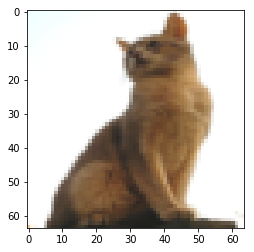

In [19]:
# Example of a picture that was wrongly classified.
index = 6
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print(d["Y_prediction_test"][0,index])
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" picture.")




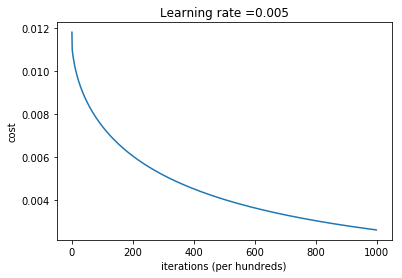

In [20]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 72.2488038277512 %
test accuracy: 42.00000000000001 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 65.55023923444976 %
test accuracy: 34.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 65.55023923444976 %
test accuracy: 34.0 %

-------------------------------------------------------



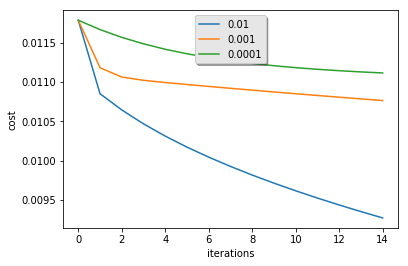

In [21]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [ ]:
## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "lulu.jpg"   # change this to the name of your image file 
## END CODE HERE ##

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(plt.imread(fname))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print(my_predicted_image[0,0])
print("y = " + str(int(my_predicted_image[0,0])) + ", your algorithm predicts a \"" + classes[int(my_predicted_image[0,0])].decode("utf-8")  +  "\" picture.")
